In [129]:
import pandas as pd
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [123]:
from mymicrograd.nn import MLP, Neuron, Layer

In [151]:
import random
np.random.seed(1337)
random.seed(1337)

In [152]:
X, y = make_circles(n_samples=100)

print(type(X), type(y))
print(X.shape)
print(y.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(100, 2)
(100,)


In [153]:
model = MLP(2, [16, 16, 1])

In [154]:
losses = []

for k in range(101):

    # forward pass
    y_pred = [model(x) for x in X]
    loss = sum([(y_out-y_true)**2 for y_true, y_out in zip(y, y_pred)])

    # backward pass
    model.zero_grad()
    loss.backward()

    # update
    for p in model.parameters():
        p.data += (-0.001 * p.grad)
    
    if k%10 == 0: 
        print(k, loss.data)
    losses.append(loss.data)

0 40.65929969986018
10 26.286942727654385
20 23.684229673605344
30 21.891755788393226
40 20.593161720973132
50 19.53264090992774
60 18.580176357711277
70 17.67867832624106
80 16.80179842210612
90 15.936645108672847
100 15.07798940398991


Text(0, 0.5, 'Loss')

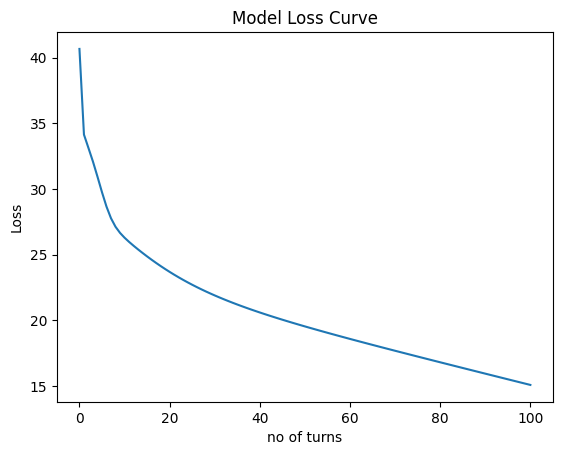

In [156]:
plt.plot(losses)
plt.title("Model Loss Curve")
plt.xlabel("no of turns")
plt.ylabel("Loss")